## Loss Functions of most 16 popular ML Algorithms
<img align="center" src="./images/LossFunctions.png"     style=" width:400px; padding: 10px; " >
  


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.datasets import make_classification, make_regression

In [4]:
def compute_loss_linear_regression(X, y, w, b):
    """
    Compute the Mean Squared Error (MSE) cost for linear regression.
    
    Args:
        X (ndarray): Shape (m, n), feature matrix with m examples and n features
        y (ndarray): Shape (m,), true labels
        w (ndarray): Shape (n,), weights
        b (float): Bias term

    Returns:
        float: The mean squared error cost
    """
    m = X.shape[0]  # Number of training examples
    cost = 0.0
    for i in range(m):
        # Linear model prediction: z = w * X + b
        z_i = np.dot(X[i], w) + b
        # Squared error
        cost += (z_i - y[i])**2
    # Compute average cost
    cost = cost / (2 * m)
    return cost

In [5]:
# Пример использования
X = np.array([[1, 2], [2, 3], [3, 4]])  # Матрица признаков (3 примера, 2 признака)
y = np.array([5, 7, 9])  # Целевые значения
w = np.array([1, 1])  # Начальные веса
b = 1  # Начальное смещение

# Вычисляем функцию потерь
loss = compute_loss_linear_regression(X, y, w, b)
print(f"Loss: {loss}")

Loss: 0.5


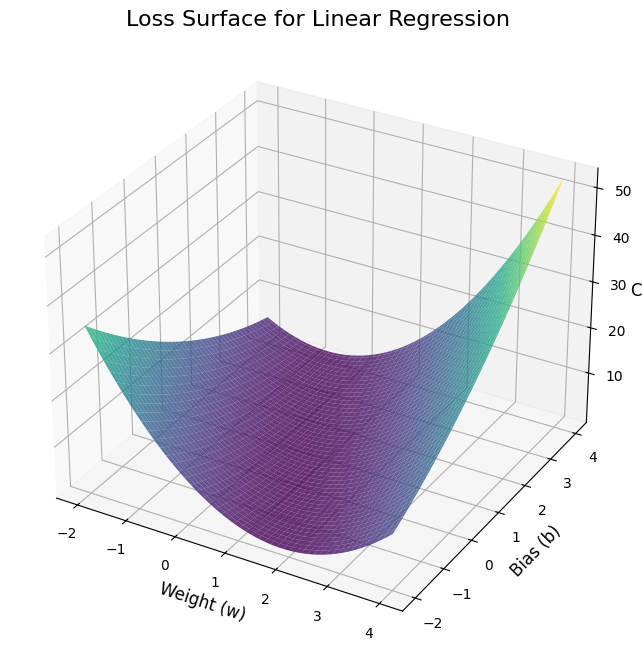

In [7]:
def compute_loss_linear_regression(X, y, w, b):
    """
    Compute the Mean Squared Error (MSE) cost for linear regression.
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        cost += (z_i - y[i])**2
    cost = cost / (2 * m)
    return cost

def plot_loss_surface(X, y):
    """
    Plot a 3D surface of the loss function with respect to weights (w) and bias (b).
    """
    w_values = np.linspace(-2, 4, 100)  # Weight range
    b_values = np.linspace(-2, 4, 100)  # Bias range
    W, B = np.meshgrid(w_values, b_values)
    Cost = np.zeros_like(W)

    # Compute the loss for each combination of w and b
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            w = np.array([W[i, j]])
            b = B[i, j]
            Cost[i, j] = compute_loss_linear_regression(X, y, w, b)

    # Plot the loss surface
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(W, B, Cost, cmap='viridis', alpha=0.8)

    # Add labels and title
    ax.set_title('Loss Surface for Linear Regression', fontsize=16)
    ax.set_xlabel('Weight (w)', fontsize=12)
    ax.set_ylabel('Bias (b)', fontsize=12)
    ax.set_zlabel('Cost', fontsize=12)

    # Show plot
    plt.show()

# Example data
X = np.array([[1], [2], [3]])  # Simple feature matrix
y = np.array([1, 2, 3])  # Target values

plot_loss_surface(X, y)

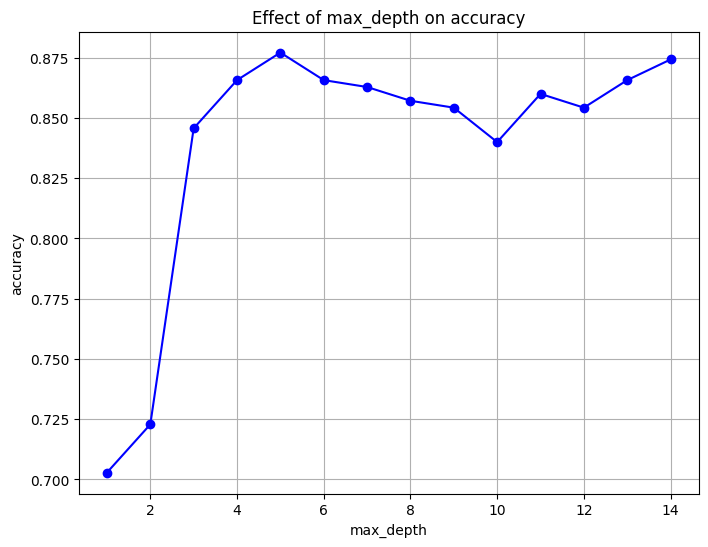

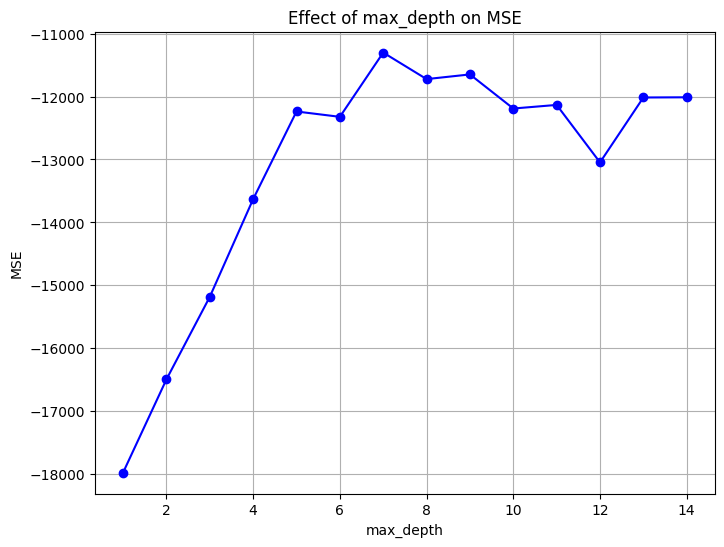

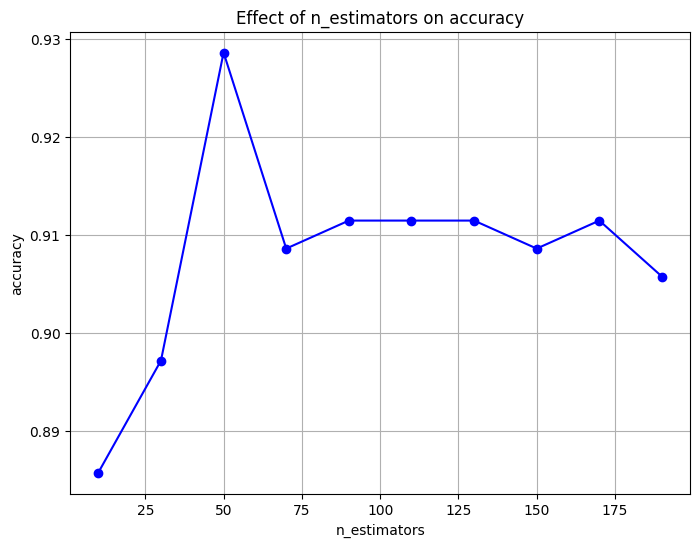

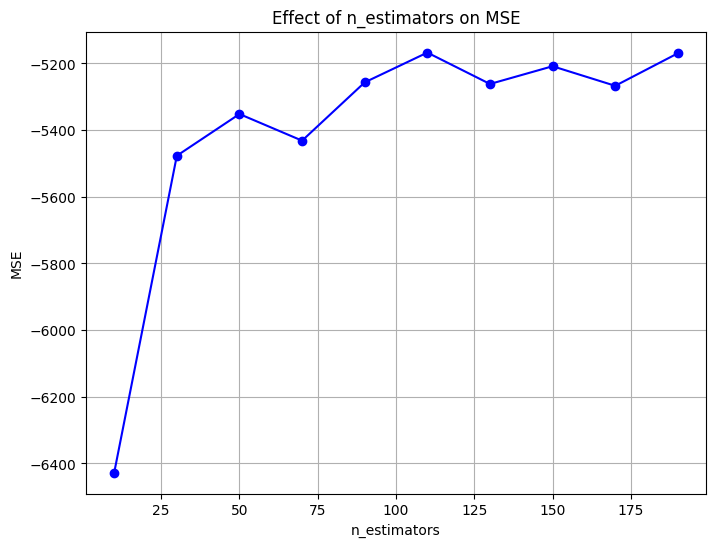

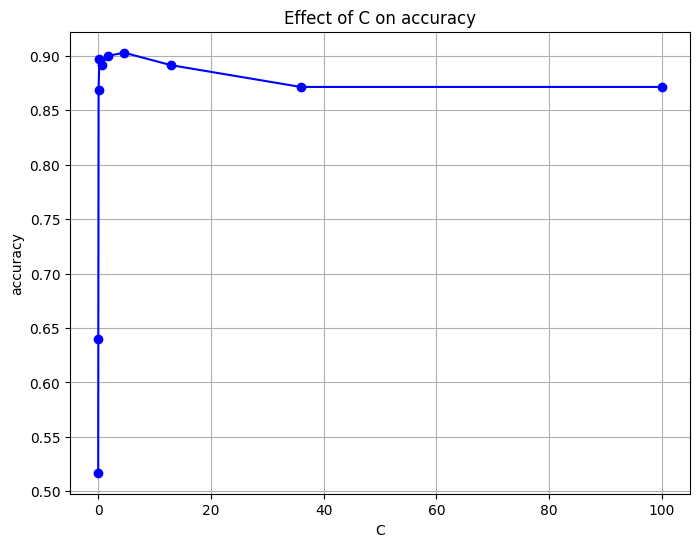

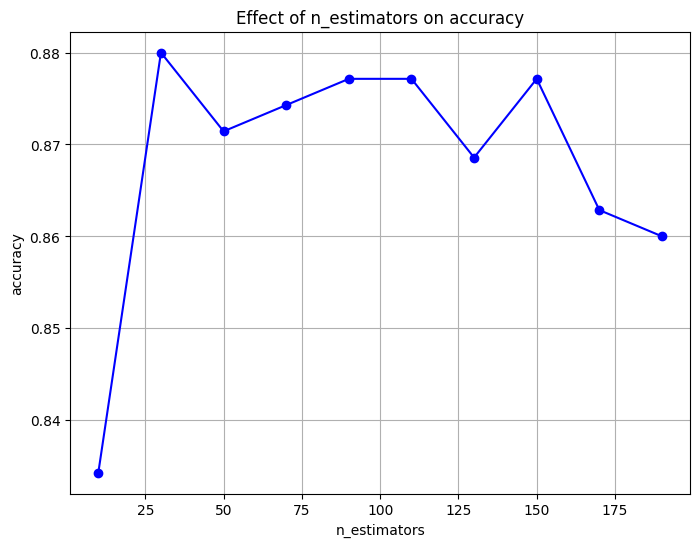

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 943
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 10
[LightGBM] [Info] Start training from score 3.972389
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

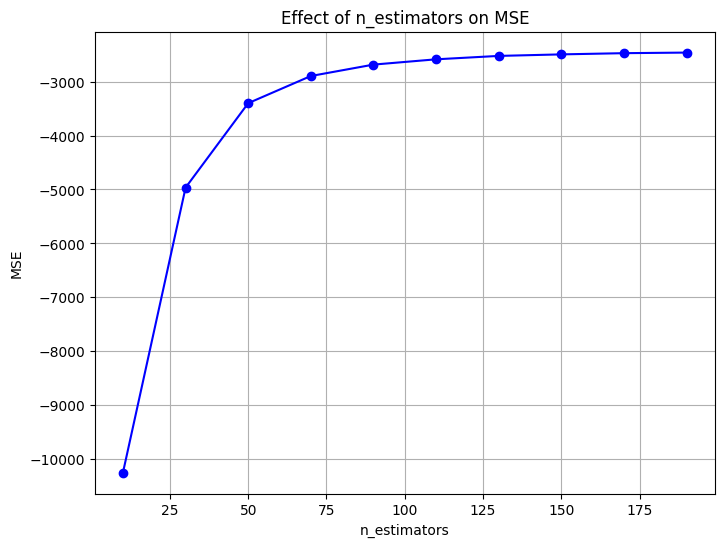

In [9]:
# --- Генерация данных ---
# Классификация
X_class, y_class = make_classification(n_samples=500, n_features=10, n_informative=5, random_state=42)
# Регрессия
X_reg, y_reg = make_regression(n_samples=500, n_features=10, noise=0.1, random_state=42)

# Разделение на обучающую и тестовую выборки
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# --- Визуализация функции потерь ---
def plot_loss(model, param_name, param_range, X, y, task="classification", scoring="accuracy"):
    """
    Построение графика функции потерь для указанного гиперпараметра.

    Args:
        model: Модель (например, DecisionTreeClassifier).
        param_name: Название гиперпараметра (например, 'max_depth').
        param_range: Диапазон значений гиперпараметра.
        X: Признаки.
        y: Целевые значения.
        task: Тип задачи ('classification' или 'regression').
        scoring: Метрика для оценки модели.

    """
    scores = []
    
    for param in param_range:
        # Установка значения гиперпараметра
        model.set_params(**{param_name: param})
        
        # Кросс-валидация
        if task == "classification":
            score = cross_val_score(model, X, y, cv=5, scoring=scoring).mean()
        else:  # Для регрессии
            score = -cross_val_score(model, X, y, cv=5, scoring=make_scorer(mean_squared_error)).mean()
        
        scores.append(score)
    
    # Построение графика
    plt.figure(figsize=(8, 6))
    plt.plot(param_range, scores, marker='o', linestyle='-', color='b')
    plt.title(f"Effect of {param_name} on {scoring if task == 'classification' else 'MSE'}")
    plt.xlabel(param_name)
    plt.ylabel(scoring if task == 'classification' else 'MSE')
    plt.grid()
    plt.show()

# --- Построение графиков для моделей ---

# 1. Decision Tree Classifier
plot_loss(
    DecisionTreeClassifier(),
    param_name="max_depth",
    param_range=range(1, 15),
    X=X_train_class,
    y=y_train_class,
    task="classification"
)

# 2. Decision Tree Regressor
plot_loss(
    DecisionTreeRegressor(),
    param_name="max_depth",
    param_range=range(1, 15),
    X=X_train_reg,
    y=y_train_reg,
    task="regression"
)

# 3. Random Forest Classifier
plot_loss(
    RandomForestClassifier(),
    param_name="n_estimators",
    param_range=range(10, 200, 20),
    X=X_train_class,
    y=y_train_class,
    task="classification"
)

# 4. Random Forest Regressor
plot_loss(
    RandomForestRegressor(),
    param_name="n_estimators",
    param_range=range(10, 200, 20),
    X=X_train_reg,
    y=y_train_reg,
    task="regression"
)

# 5. Support Vector Machines (SVC)
plot_loss(
    SVC(),
    param_name="C",
    param_range=np.logspace(-2, 2, 10),
    X=X_train_class,
    y=y_train_class,
    task="classification"
)

# 6. AdaBoost Classifier
plot_loss(
    AdaBoostClassifier(),
    param_name="n_estimators",
    param_range=range(10, 200, 20),
    X=X_train_class,
    y=y_train_class,
    task="classification"
)

# 7. LightGBM (LGBMRegressor)
plot_loss(
    lgb.LGBMRegressor(),
    param_name="n_estimators",
    param_range=range(10, 200, 20),
    X=X_train_reg,
    y=y_train_reg,
    task="regression"
)

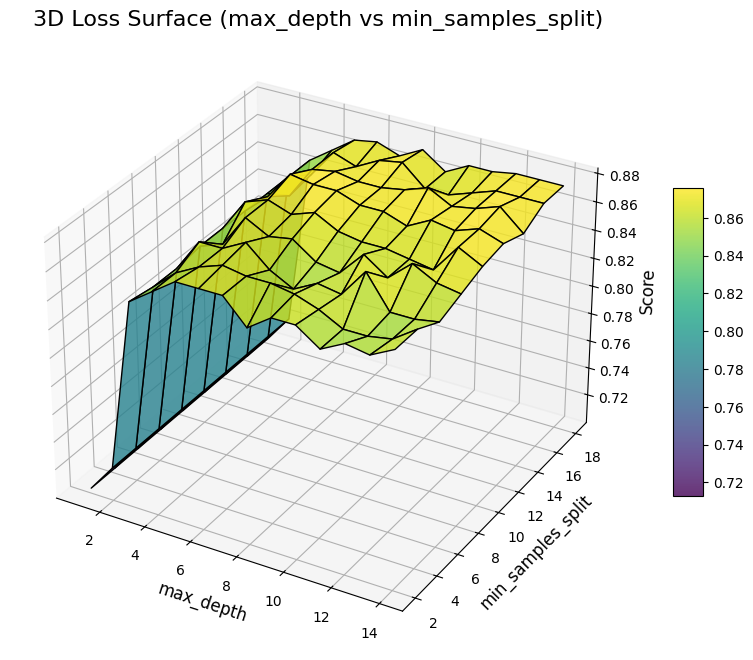

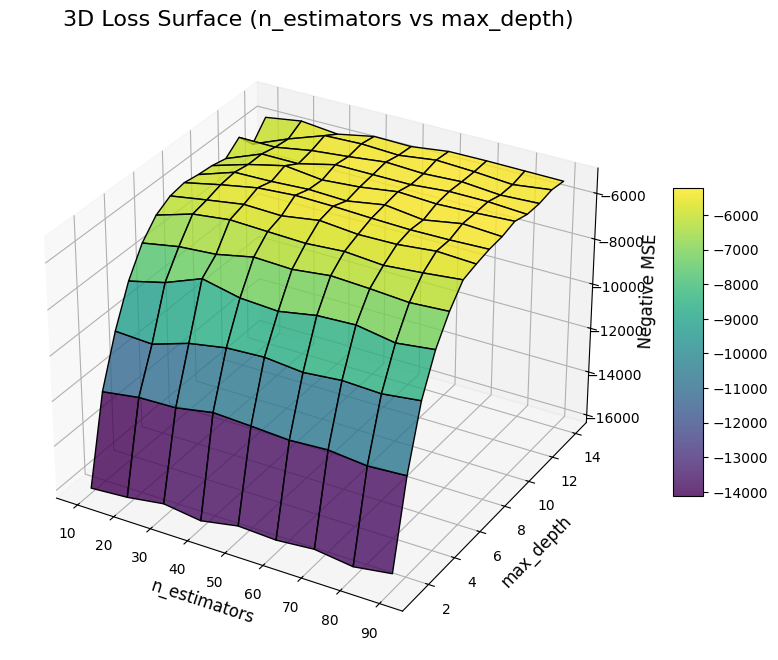

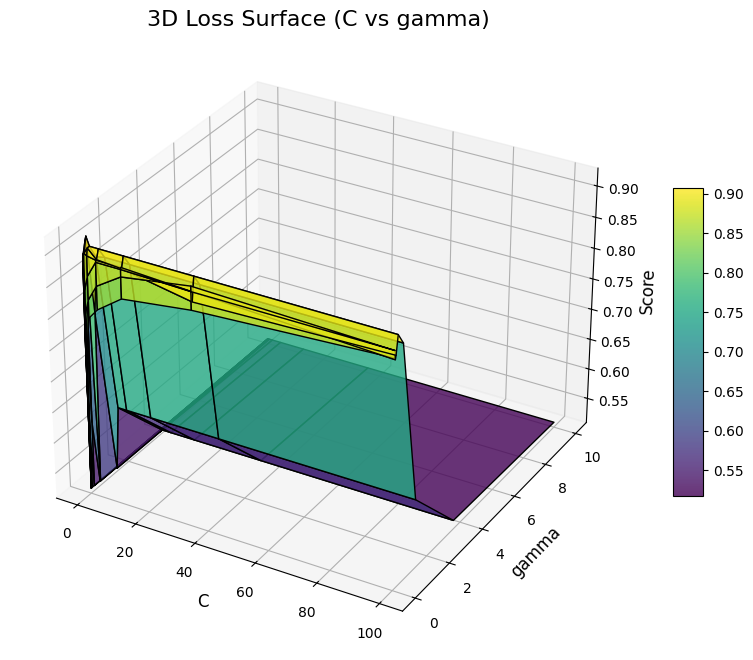

In [10]:
# Функция для 3D-визуализации
def plot_3d_loss(model, param1_name, param1_range, param2_name, param2_range, X, y, task="classification"):
    """
    Построение 3D-графика функции потерь для двух гиперпараметров.

    Args:
        model: Модель (например, DecisionTreeClassifier).
        param1_name: Название первого гиперпараметра.
        param1_range: Диапазон значений первого гиперпараметра.
        param2_name: Название второго гиперпараметра.
        param2_range: Диапазон значений второго гиперпараметра.
        X: Признаки.
        y: Целевые значения.
        task: Тип задачи ('classification' или 'regression').

    """
    Param1, Param2 = np.meshgrid(param1_range, param2_range)
    Scores = np.zeros_like(Param1, dtype=np.float64)

    # Вычисление функции потерь для каждой комбинации параметров
    for i in range(Param1.shape[0]):
        for j in range(Param1.shape[1]):
            params = {
                param1_name: Param1[i, j],
                param2_name: Param2[i, j]
            }
            model.set_params(**params)
            if task == "classification":
                score = cross_val_score(model, X, y, cv=5, scoring="accuracy").mean()
            else:
                score = -cross_val_score(model, X, y, cv=5, scoring=make_scorer(mean_squared_error)).mean()
            Scores[i, j] = score

    # Построение 3D-графика
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(Param1, Param2, Scores, cmap="viridis", edgecolor='k', alpha=0.8)

    ax.set_title(f"3D Loss Surface ({param1_name} vs {param2_name})", fontsize=16)
    ax.set_xlabel(param1_name, fontsize=12)
    ax.set_ylabel(param2_name, fontsize=12)
    ax.set_zlabel("Score" if task == "classification" else "Negative MSE", fontsize=12)
    fig.colorbar(surf, shrink=0.5, aspect=10)
    plt.show()

# --- Примеры построения 3D-графиков ---

# 1. Decision Tree Classifier
plot_3d_loss(
    DecisionTreeClassifier(),
    param1_name="max_depth",
    param1_range=range(1, 15),
    param2_name="min_samples_split",
    param2_range=range(2, 20, 2),
    X=X_train_class,
    y=y_train_class,
    task="classification"
)

# 2. Random Forest Regressor
plot_3d_loss(
    RandomForestRegressor(),
    param1_name="n_estimators",
    param1_range=range(10, 100, 10),
    param2_name="max_depth",
    param2_range=range(1, 15),
    X=X_train_reg,
    y=y_train_reg,
    task="regression"
)

# 3. Support Vector Machines (SVC)
plot_3d_loss(
    SVC(),
    param1_name="C",
    param1_range=np.logspace(-2, 2, 10),
    param2_name="gamma",
    param2_range=np.logspace(-3, 1, 10),
    X=X_train_class,
    y=y_train_class,
    task="classification"
)